# PRACTICA 5 - CONVOLUCIÓN

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plti

from matplotlib import cm #Para graficar los kernels
from scipy.signal import convolve2d #Función para hacer la convolución

%matplotlib inline

In [2]:
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):
    return apply_matrix(img, M_RGB)
 
def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

# libraria estadistica 
import scipy.stats as st

def gaussian(N, sigma=1):
    x = np.linspace(-sigma, sigma, N+1) #linspace crea un vector de valores entre -sigma y sigma igualmente distribuidos
    gaussian_dist = np.diff(st.norm.cdf(x)) #CDF = Cumulative distribution function NORM: distribucion normal/gaussiana.
    gaussian_filter = np.outer(gaussian_dist, gaussian_dist)
    return gaussian_filter/gaussian_filter.sum()

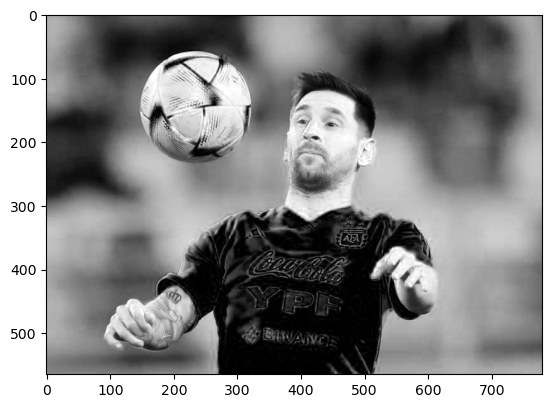

In [3]:
img = imageio.v2.imread("messi.jpg")[:,:,0]/255
plt.imshow(img, 'gray')

In [4]:
from matplotlib import cm

#Para dibujar el Kernel en 3D.
def plot_kernel(data, ax=None):
    rows, cols = data.shape
    y, x = np.meshgrid(np.arange(rows),np.arange(cols),indexing='ij')
    if ax == None:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
    _min, _max = (np.min(data), np.max(data))
    ax.plot_surface(x, y, data.T, cmap=cm.jet, vmin=_min, vmax=_max)

#Para graficar imagen, imagen filtrada y kernel en un solo grafico.
def plot_images_and_kernel(img, img_filt, kernel):
    fig = plt.figure(figsize=(17,5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img, 'gray')
    ax1.title.set_text('Input image')
    ax2 = fig.add_subplot(132)
    ax2.imshow(img_filt, 'gray')
    ax2.title.set_text('Filtered image')
    ax3 = fig.add_subplot(133, projection='3d')
    plot_kernel(kernel, ax=ax3)
    ax3.title.set_text('Kernel')
    plt.show()

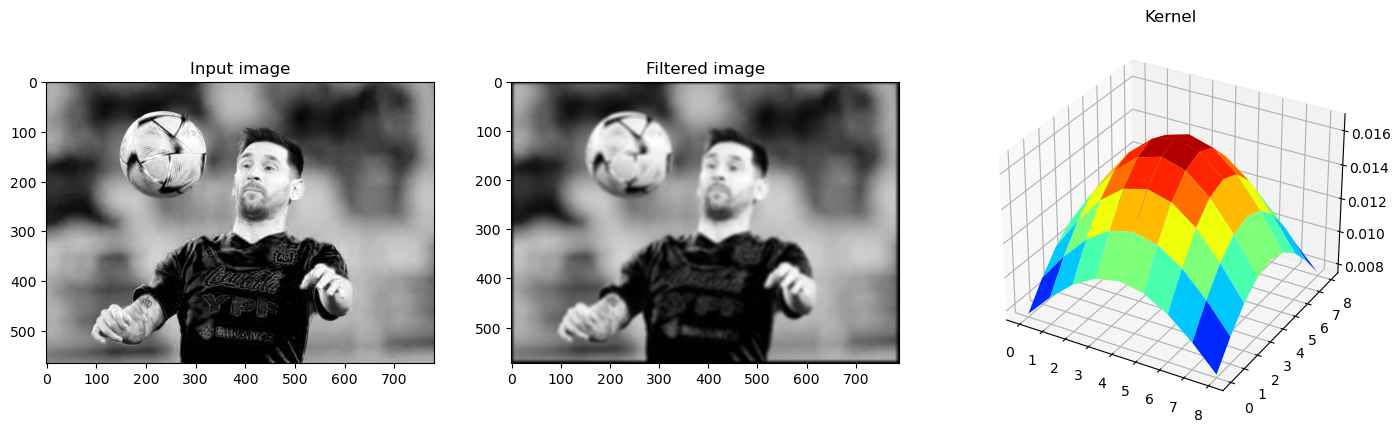

In [17]:
# Ejemplo del kernel identidad o matriz de convolucion
kernel = np.zeros((3,3))


kernel = gaussian(9)

# kernel /= kernel.sum()

# print(kernel)

img_filt = convolve2d(img, kernel, mode='full')
plot_images_and_kernel(img, img_filt, kernel)

## Practica

Convolucionar una imagen con distintos kernels y utilizar la función plot_images_and_kernel() para graficar el resultado.

### 1.1. Implementar los siguientes filtros simétricos (invariantes a la rotación de 90°)

Pasabajos: Definir un kernel de tamaño NxN, con N impar. (Los pasabajos se normalizan dividiendo por la suma del kernel)

1. Box (cuadrado)
2. Circle (circular)
3. Bartlett (piramidal)
4. Gaussian

Pasaaltos:

5. Laplace (4 y 8 vecinos)
6. Pasaaltos a partir de un pasabajos: PA = Id - PB

Pasabanda:

7. Difference of Gaussian (DoG)   

Otros:

8. Mejora de contraste (combinación del filtro identidad más "un poco" de pasaaltos) 

### 1.2. Implementar los siguientes filtros  asimétricos (direccionales)

Sobel 3x3 -> Calcular valor absoluto de gradientes Gx y Gy.

### 1.3. Implementar un detector de bordes a partir del filtro de Sobel

Aplicar un umbral al módulo del filtro de Sobel para obtener una imagen binaria con 1s y 0s.


### -----------------------------------------------------------------------------------------------------------

In [46]:
N = 3
kernel = np.ones((N,N))/(N*N)



#Box(cuadrado)
kernel_box = np.array([[1,1,1],
                      [1,1,1],
                      [1,1,1]])


#Bartlet(triangular)
kernel_bartlet = np.array([[1,2,1],
                          [2,4,2],
                          [1,2,1]])


# Laplaciano
kernel_laplaciano = np.array([[0,-1,0],
                              [-1,4,-1],
                              [0,-1,0]])



kernel_gaussiano = gaussian(9)


#Filtros Sobel
kernelX = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

kernelY = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])


# bordes mas marcados
kernel_borde = np.eye(3)


# kernel = kernel/kernel.sum()

# Mejora de contraste - Filtro de identidad con minimo pasaalto

kid = np.array([[0,0,0],
                 [0,1,0],
                 [0,0,0]])

kernel_contraste = kernel*0.2 + kid


print("Box \n", kernel_box)
print("Bartlet \n", kernel_bartlet)
print("Laplaciano \n", kernel_laplaciano)
print("Sobel X \n", kernelX)
print("Sobel Y \n", kernelY)
print("Bordes \n", kernel_borde)
print("Contraste \n", kernel_contraste)





Box 
 [[1 1 1]
 [1 1 1]
 [1 1 1]]
Bartlet 
 [[1 2 1]
 [2 4 2]
 [1 2 1]]
Laplaciano 
 [[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
Sobel X 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Sobel Y 
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]
Bordes 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Contraste 
 [[0.02222222 0.02222222 0.02222222]
 [0.02222222 1.02222222 0.02222222]
 [0.02222222 0.02222222 0.02222222]]


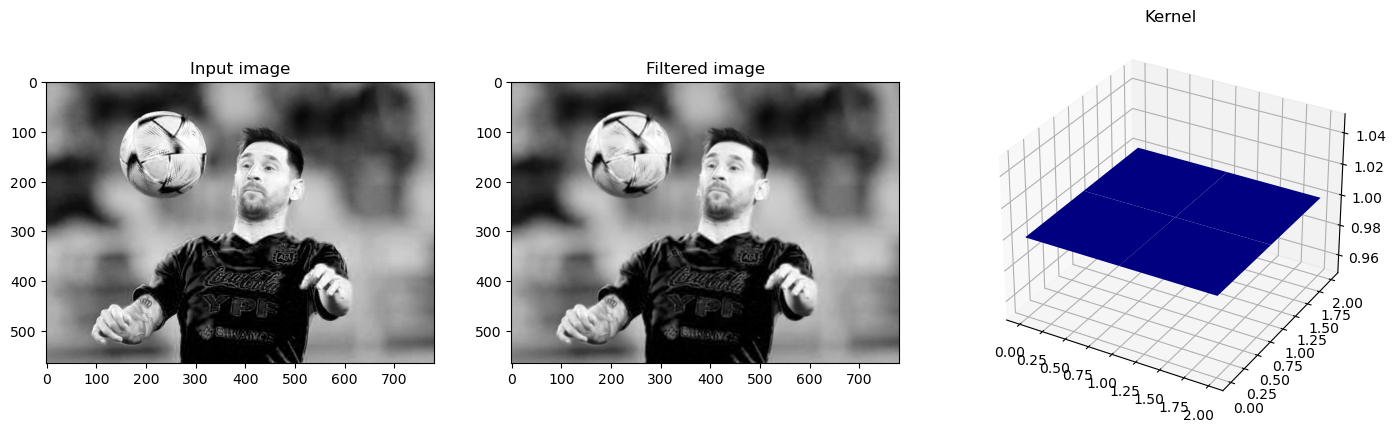

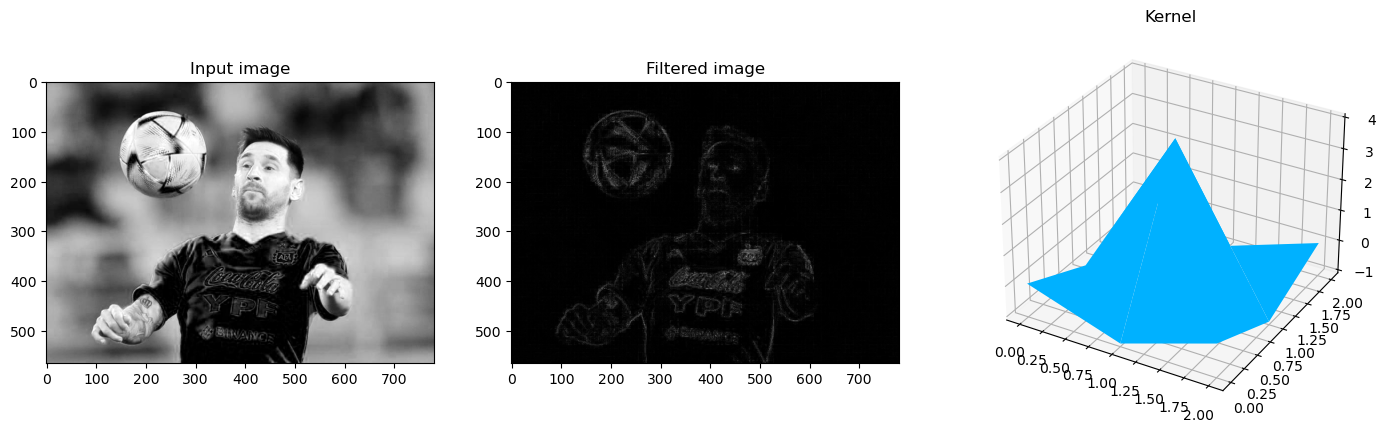

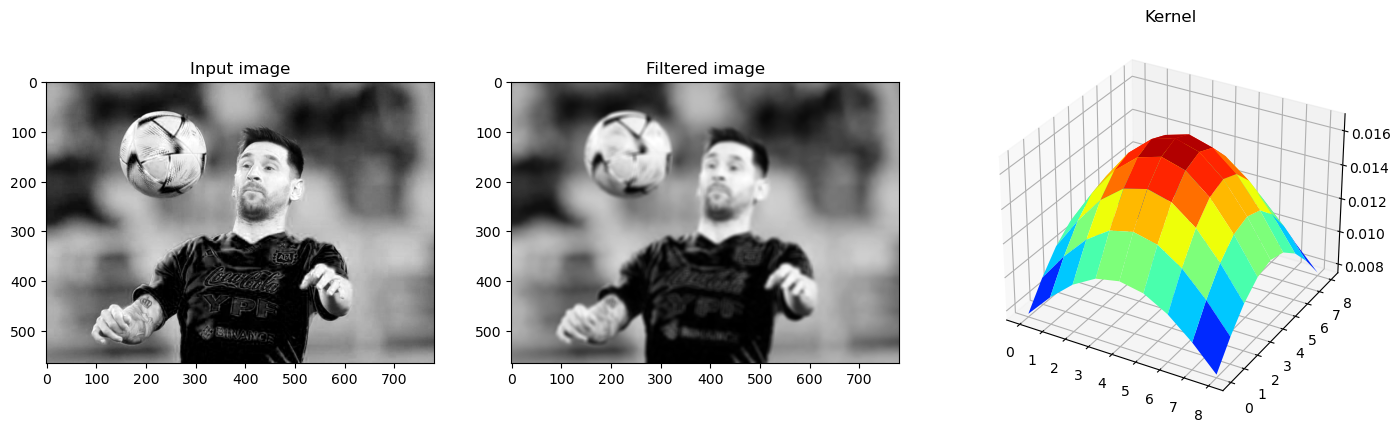

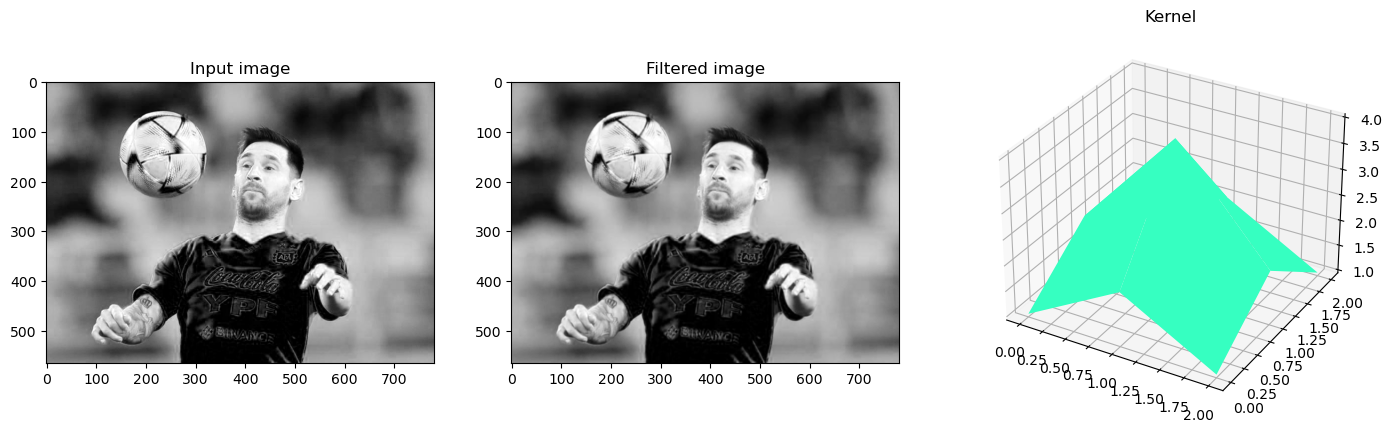

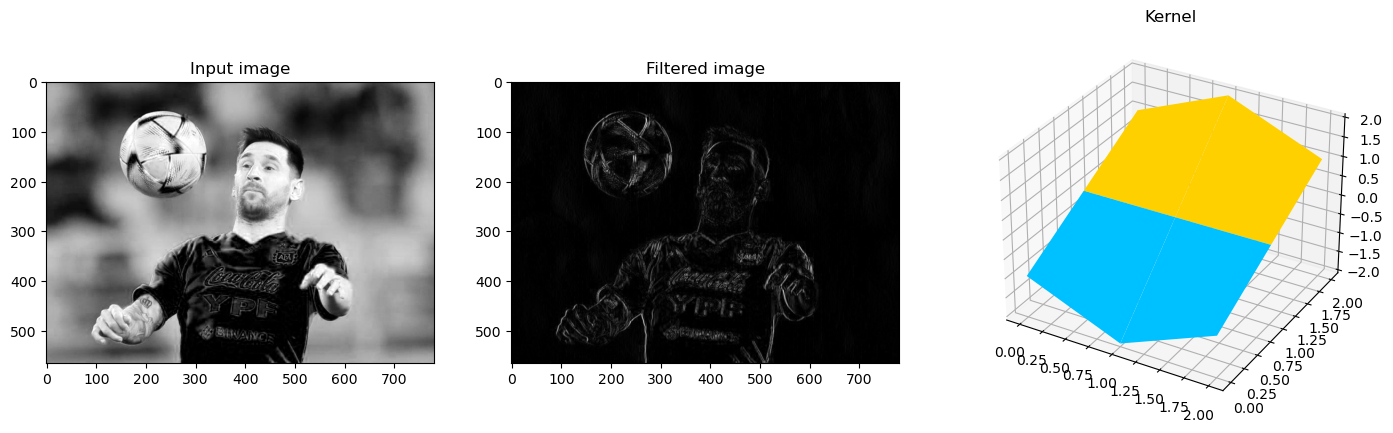

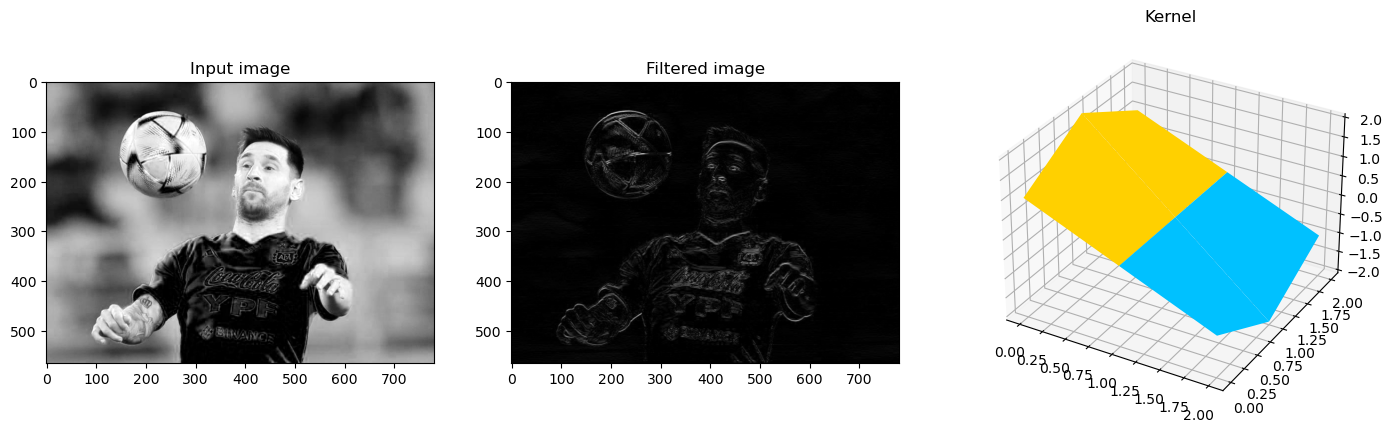

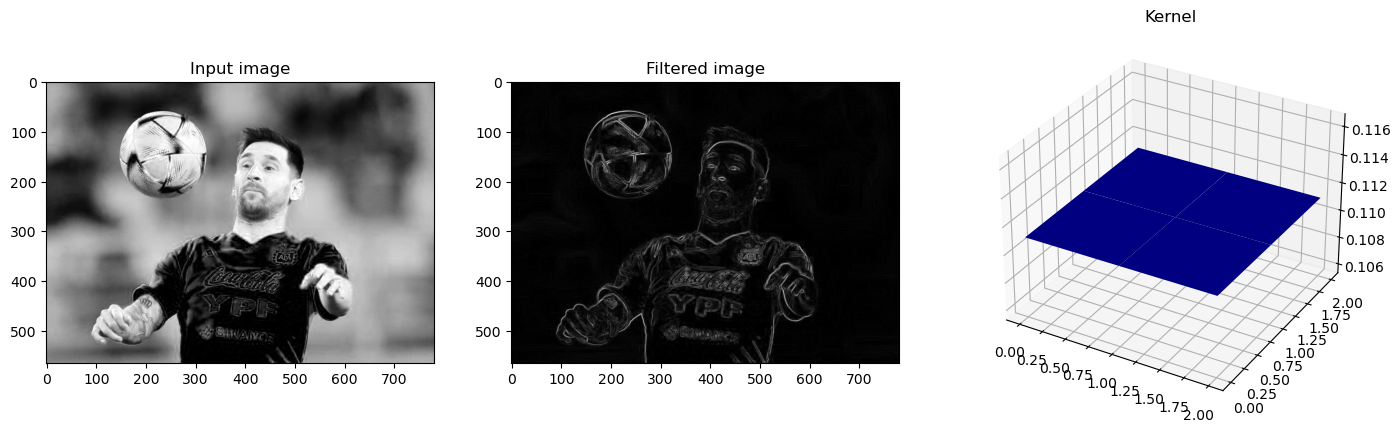

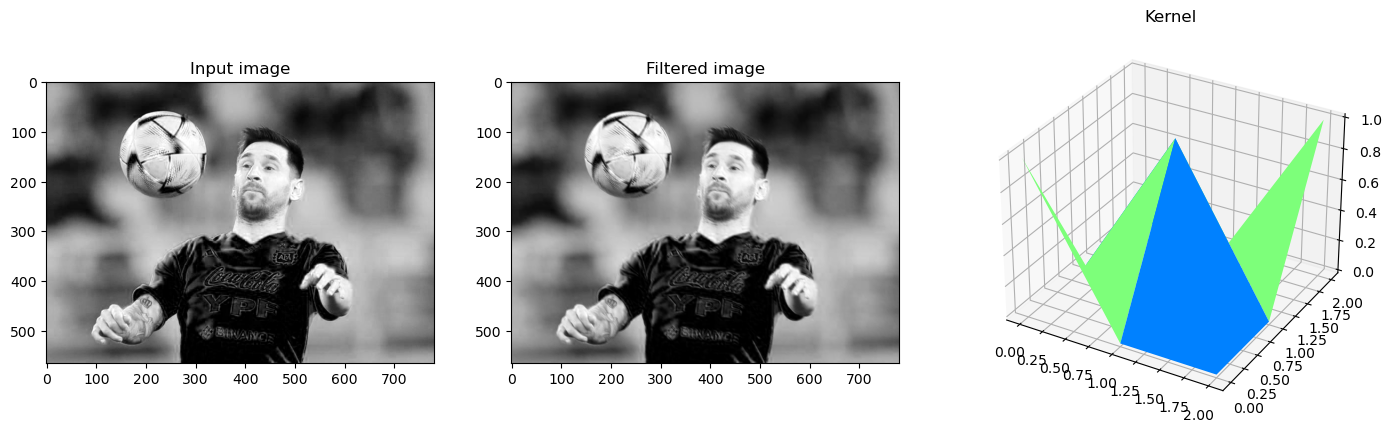

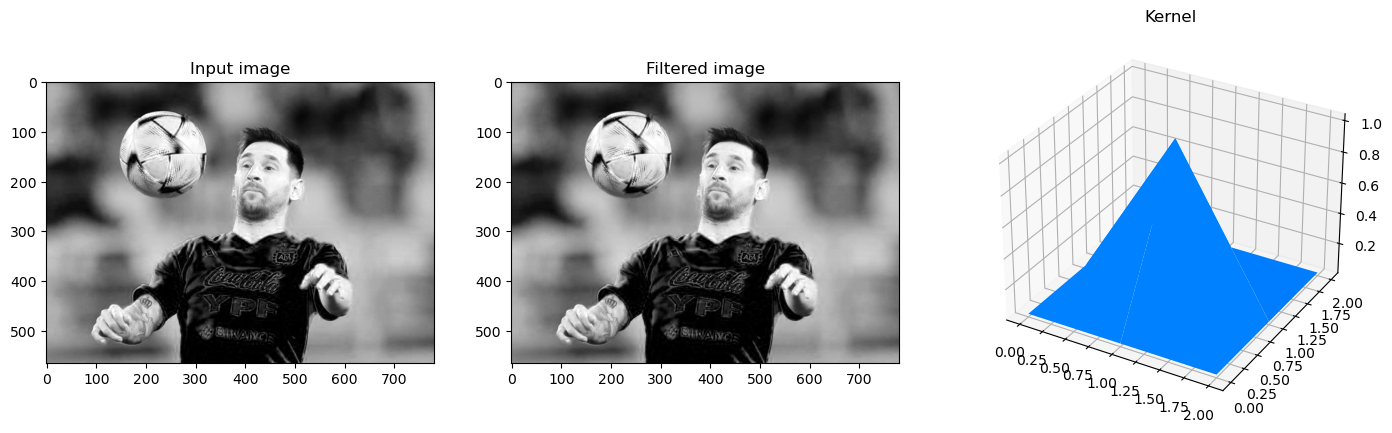

In [48]:

img_filt_Box = convolve2d(img, kernel_box, mode='same',boundary='symm')
img_filt_Laplaciano = convolve2d(img, kernel_laplaciano, mode='same',boundary='symm')
img_filt_Gaussiano = convolve2d(img, kernel_gaussiano, mode='same',boundary='symm')
img_filt_Bartlet = convolve2d(img, kernel_bartlet, mode='same',boundary='symm')
img_filt_X = convolve2d(img, kernelX, mode='same',boundary='symm')
img_filt_Y = convolve2d(img, kernelY, mode='same',boundary='symm')
#Valor absoluto de Gx - Gy
absoluto = np.sqrt(img_filt_X*img_filt_X + img_filt_Y*img_filt_Y)
img_filt_borde = convolve2d(img, kernel_borde, mode='same',boundary='symm')
img_filt_Contraste = convolve2d(img, kernel_contraste, mode='same',boundary='symm')

plot_images_and_kernel(img, abs(img_filt_Box), kernel_box)
plot_images_and_kernel(img, abs(img_filt_Laplaciano), kernel_laplaciano)
plot_images_and_kernel(img, abs(img_filt_Gaussiano), kernel_gaussiano)
plot_images_and_kernel(img, abs(img_filt_Bartlet), kernel_bartlet)
plot_images_and_kernel(img, abs(img_filt_X), kernelX)
plot_images_and_kernel(img, abs(img_filt_Y), kernelY)
plot_images_and_kernel(img, absoluto, kernel)
plot_images_and_kernel(img, abs(img_filt_borde), kernel_borde)
plot_images_and_kernel(img, abs(img_filt_Contraste), kernel_contraste)

In [ ]:
plti.imsave("espectro.png", abs(img_filt_X), cmap='gray')
plti.imsave("espectro2.png", abs(img_filt_Y), cmap='gray')
plti.imsave("espectro3.png", absoluto, cmap='gray')